## Kagle Spaceship Titanic Problem

###### Here I have used SVM Classifier and a simple ANN to classify the data

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from keras.layers import Dense, Dropout
from keras import Input, Model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import MeanSquaredLogarithmicError
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

### Loading Data

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

### Understanding the Data

In [3]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [4]:
# Droping the NaN values from the data set
train_df=train_df.dropna()
test_df=test_df.dropna()

In [5]:
t_pass=test_df['PassengerId'].values

In [6]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train_df['HomePlanet'].value_counts()# Checking the classes in HomePlanet Column

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [8]:
train_df['Destination'].value_counts() # Checking the classes in Destination Column

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [9]:
train_df['Cabin'].value_counts() # Checking the classes in Cabin Column

G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: Cabin, Length: 5305, dtype: int64

In [10]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Preprocessing in Training Data 

In [11]:
#Replacing the string data into integer data so that we can train our model
train_df['HomePlanet'].replace(to_replace=['Earth', 'Europa', 'Mars'], value=[1, 2, 3], inplace=True)
train_df['CryoSleep'].replace(to_replace=[False, True], value=[0,1], inplace=True)
train_df['Destination'].replace(to_replace=['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], value=[1, 2, 3], inplace=True)
train_df['VIP'].replace(to_replace=[False,True], value=[0,1], inplace=True)
train_df['Transported'].replace(to_replace=[False,True], value=[0,1], inplace=True)

In [12]:
cab = train_df["Cabin"].str.split("/", n = 2, expand = True)
train_df['Deck'],train_df['Num'],train_df['Side']=cab[0],cab[1],cab[2]

In [13]:
train_df['Deck'].replace(to_replace=['F','G','E','B','C','D','A','T'], value=[1,2,3,4,5,6,7,8], inplace=True)
train_df['Side'].replace(to_replace=['S','P'],value=[1,2],inplace=True)

In [14]:
##CHecking the Data
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,2,0,B/0/P,1,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,4,0,2
1,0002_01,1,0,F/0/S,1,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,0,1
2,0003_01,2,0,A/0/S,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,7,0,1
3,0003_02,2,0,A/0/S,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,7,0,1
4,0004_01,1,0,F/1/S,1,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,1,1


### Droping Extra Columns 

In [15]:
train_df=train_df.drop(['PassengerId','Cabin','Name','Num'],axis=1)

### Preprocessing in Test Data

In [16]:
test_df['HomePlanet'].replace(to_replace=['Earth', 'Europa', 'Mars'], value=[1, 2, 3], inplace=True)
test_df['CryoSleep'].replace(to_replace=[False, True], value=[0,1], inplace=True)
test_df['Destination'].replace(to_replace=['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'], value=[1, 2, 3], inplace=True)
test_df['VIP'].replace(to_replace=[False,True], value=[0,1], inplace=True)

cab = test_df["Cabin"].str.split("/", n = 2, expand = True)
test_df['Deck'],test_df['Num'],test_df['Side']=cab[0],cab[1],cab[2]

test_df['Deck'].replace(to_replace=['F','G','E','B','C','D','A','T'], value=[1,2,3,4,5,6,7,8], inplace=True)
test_df['Side'].replace(to_replace=['S','P'],value=[1,2],inplace=True)
test_df=test_df.drop(['PassengerId','Cabin','Name','Num'],axis=1)
##CHecking the Data

In [17]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,1,1,27.0,0,0.0,0.0,0.0,0.0,0.0,2,1
1,1,0,1,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,1
2,2,1,2,31.0,0,0.0,0.0,0.0,0.0,0.0,5,1
3,2,0,1,38.0,0,0.0,6652.0,0.0,181.0,585.0,5,1
4,1,0,1,20.0,0,10.0,0.0,635.0,0.0,0.0,1,1


### Scaling and Normalizing Data

In [18]:
standard_scaler = StandardScaler()
x_train=train_df.loc[:, train_df.columns != 'Transported']
y_train=train_df['Transported']
x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(standard_scaler.fit_transform(test_df),columns=test_df.columns)

### Building ANN

In [19]:
hidden_units1 = 256
hidden_units2 = 1024
hidden_units3 = 256
learning_rate = 0.01
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='sigmoid')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [20]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
83/83 [==============================] - 1s 7ms/step - loss: 0.0758 - mean_squared_logarithmic_error: 0.0760 - val_loss: 0.0680 - val_mean_squared_logarithmic_error: 0.0683
Epoch 2/10
83/83 [==============================] - 0s 5ms/step - loss: 0.0693 - mean_squared_logarithmic_error: 0.0692 - val_loss: 0.0664 - val_mean_squared_logarithmic_error: 0.0669
Epoch 3/10
83/83 [==============================] - 0s 5ms/step - loss: 0.0685 - mean_squared_logarithmic_error: 0.0685 - val_loss: 0.0661 - val_mean_squared_logarithmic_error: 0.0664
Epoch 4/10
83/83 [==============================] - 0s 5ms/step - loss: 0.0680 - mean_squared_logarithmic_error: 0.0680 - val_loss: 0.0628 - val_mean_squared_logarithmic_error: 0.0634
Epoch 5/10
83/83 [==============================] - 0s 5ms/step - loss: 0.0663 - mean_squared_logarithmic_error: 0.0662 - val_loss: 0.0624 - val_mean_squared_logarithmic_error: 0.0629
Epoch 6/10
83/83 [==============================] - 0s 4ms/step - loss: 0.0657 -

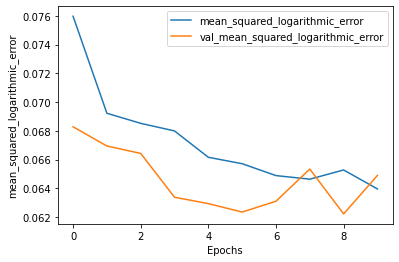

In [21]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [22]:
Y_ann=(model.predict(standard_scaler.transform(x_test_scaled.values)) > 0.5)

 53/103 [==============>...............] - ETA: 0s

C:\Users\ARNAB SARKAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


103/103 [==============================] - 0s 2ms/step


In [23]:
X_ann=(model.predict(standard_scaler.transform(x_train_scaled.values)) > 0.5)
dd=[]
for i in X_ann:
    if i==True:
        dd.append(1)
    else:
        dd.append(0)

 86/207 [===========>..................] - ETA: 0s

C:\Users\ARNAB SARKAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


207/207 [==============================] - 0s 2ms/step


In [24]:
Y_a=list(Y_ann)

### SVM Method 

In [25]:
svc=SVC().fit(x_train_scaled.values,y_train)
y_pre_train=svc.predict(x_train_scaled.values)

In [26]:
y_pre_test=svc.predict(x_test_scaled.values)

### Model Performance

In [27]:
print('Accuracy from SVM',accuracy_score(y_train,y_pre_train))
print('Accuracy from ANN',accuracy_score(y_train,dd))


Accuracy from SVM 0.8121404783530124
Accuracy from ANN 0.6883136542537087


In [28]:
print('Precision from SVM',precision_score(y_train,y_pre_train))
print('Precision from ANN',precision_score(y_train,dd))

Precision from SVM 0.7998849913743531
Precision from ANN 0.8095703125


In [29]:
print('Recall from SVM',recall_score(y_train,y_pre_train))
print('Recall from ANN',recall_score(y_train,dd))

Recall from SVM 0.8361887586414187
Recall from ANN 0.4983468590321611


In [30]:
print('F1 Score from SVM',f1_score(y_train,y_pre_train))
print('F1 Score from ANN',f1_score(y_train,dd))

F1 Score from SVM 0.817634092578986
F1 Score from ANN 0.6169302325581395


### Saving Data in csv format  

In [91]:
sub_df=pd.read_csv('sample_submission.csv')

In [92]:
pas_id=sub_df['PassengerId'].values
Ts=sub_df['Transported'].values
for i in range(len(t_pass)):
    if(t_pass[i] in pas_id):
        t=list(pas_id).index(t_pass[i])
        if(Y_a[i]==False):
            Ts[t]=False
        else:
            Ts[t]=True

In [94]:
sub_df['Transported']=Ts


In [67]:
sub_df.to_csv('Try3.csv')